In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

sns.set_context('notebook', font_scale=1.5)
sns.set_style('darkgrid')

2023-11-29 07:06:39.140236: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-29 07:06:39.140413: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-29 07:06:39.199382: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-29 07:06:39.302027: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-29 07:06:40.382335: W tensorflow/compiler/tf2

In [2]:
df = pd.read_csv('Student_Performance.csv')

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
df.size

60000

In [6]:
df.shape

(10000, 6)

### EDA

In [7]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [8]:
df.duplicated().sum()

127

Text(0, 0.5, 'Count')

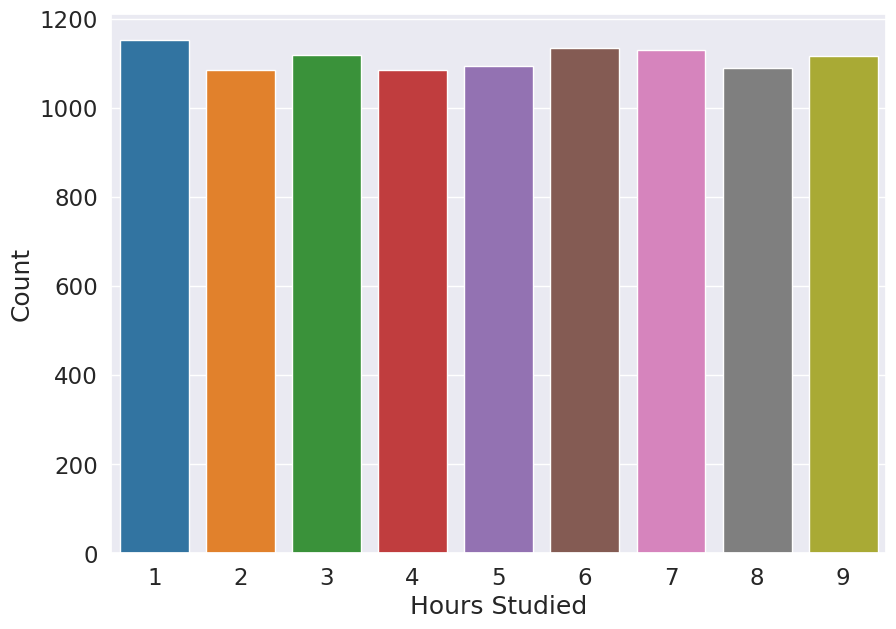

In [9]:
plt.figure(figsize=(10,7))
sns.countplot(x=df['Hours Studied'])
plt.ylabel('Count')

Text(0, 0.5, 'Count')

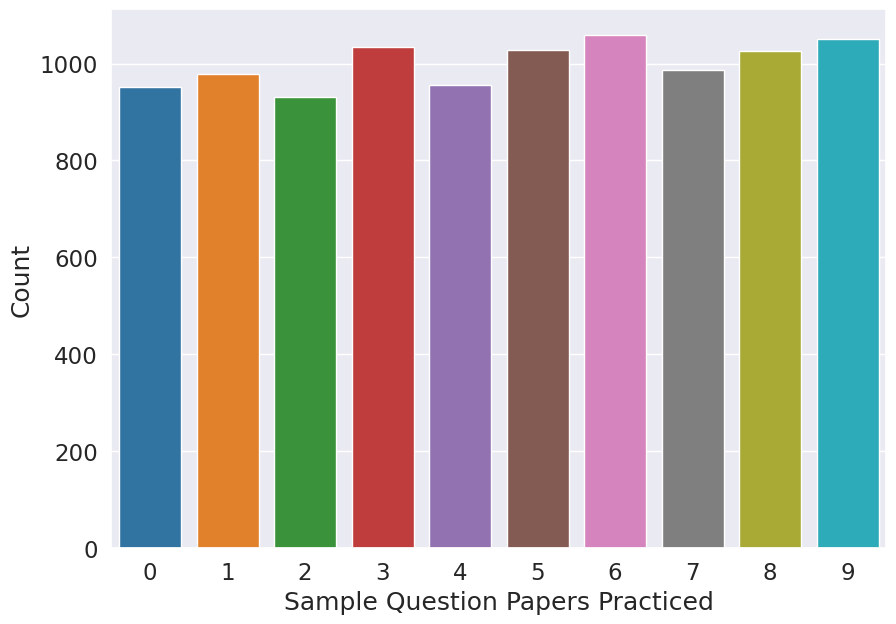

In [10]:
plt.figure(figsize=(10,7))
sns.countplot(x=df['Sample Question Papers Practiced'])
plt.ylabel('Count')

Text(0, 0.5, 'Count')

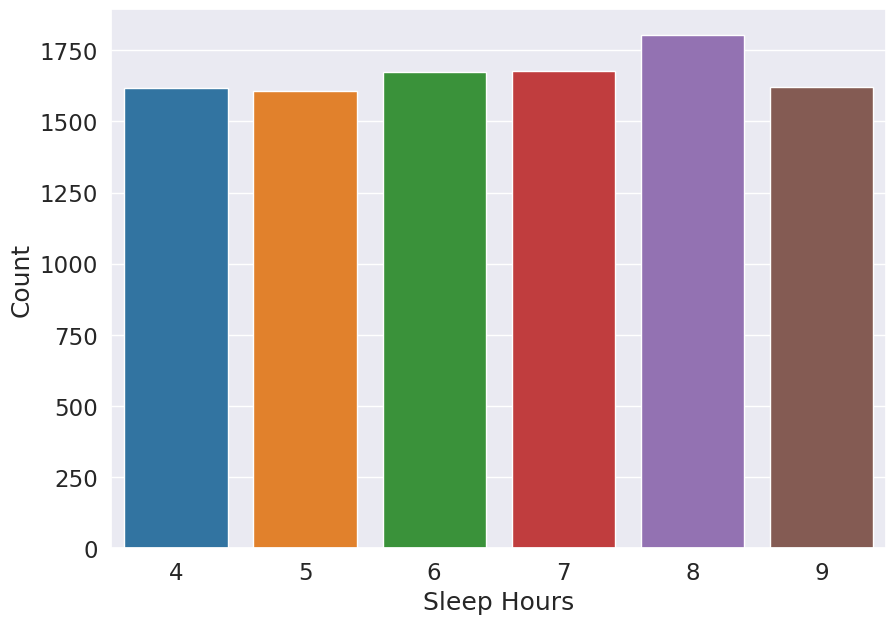

In [11]:
plt.figure(figsize=(10,7))
sns.countplot(x=df['Sleep Hours'])
plt.ylabel('Count')

Text(0, 0.5, 'Count')

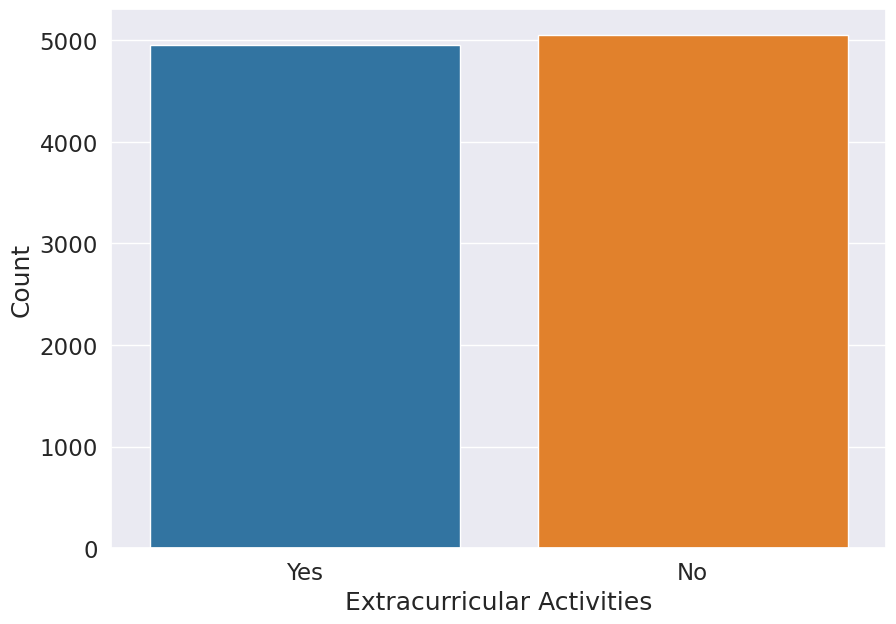

In [12]:
plt.figure(figsize=(10,7))
sns.countplot(x=df['Extracurricular Activities'])
plt.ylabel('Count')

Text(0, 0.5, 'Count')

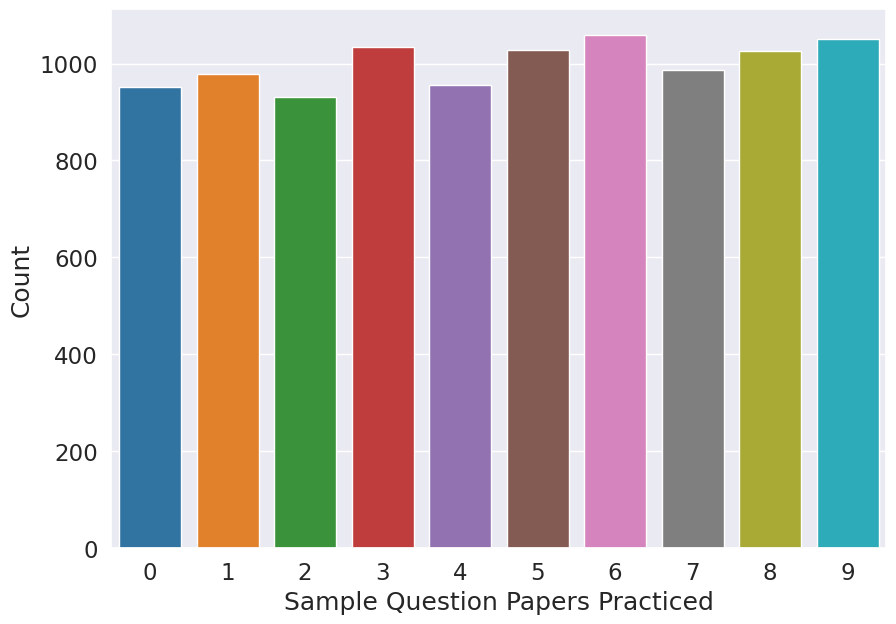

In [13]:
plt.figure(figsize=(10,7))
sns.countplot(x=df['Sample Question Papers Practiced'])
plt.ylabel('Count')

<Axes: xlabel='Extracurricular Activities', ylabel='Performance Index'>

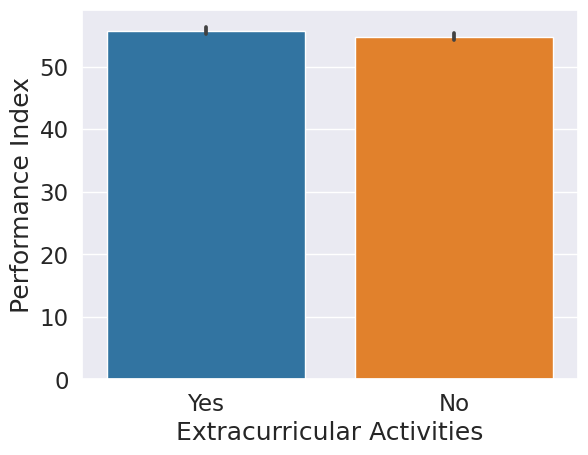

In [14]:
sns.barplot(x=df['Extracurricular Activities'], y=df['Performance Index'])

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

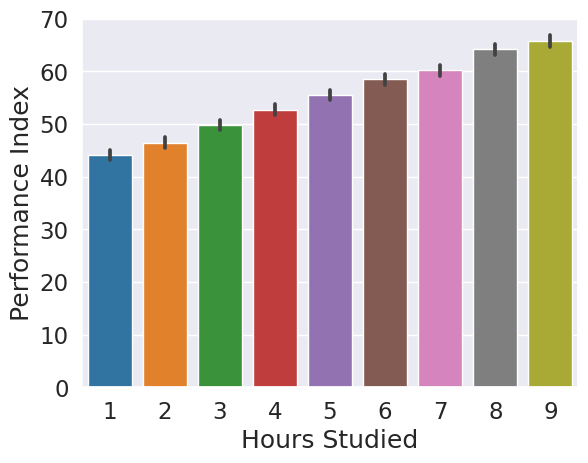

In [15]:
sns.barplot(x=df['Hours Studied'], y=df['Performance Index'])

<Axes: xlabel='Sample Question Papers Practiced', ylabel='Performance Index'>

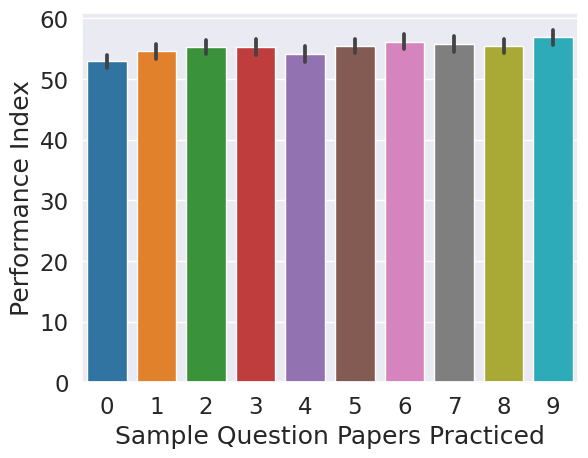

In [16]:
sns.barplot(x=df['Sample Question Papers Practiced'], y=df['Performance Index'])

<Axes: xlabel='Sleep Hours', ylabel='Performance Index'>

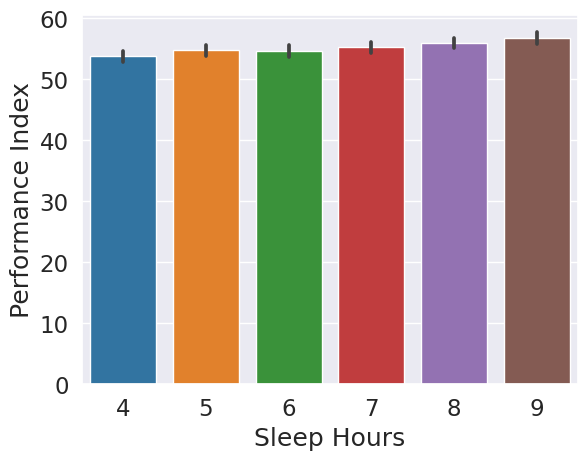

In [17]:
sns.barplot(x=df['Sleep Hours'], y=df['Performance Index'])

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

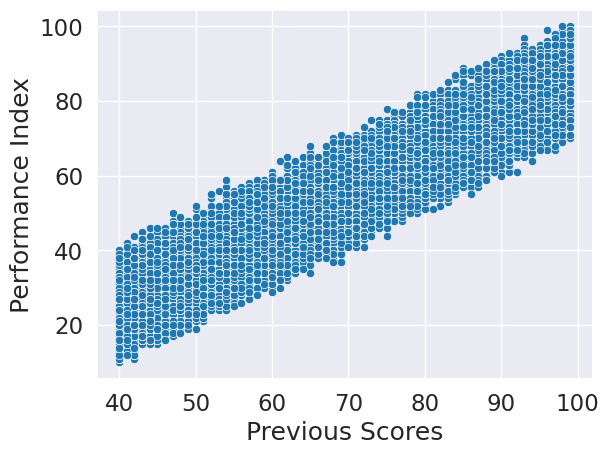

In [18]:
sns.scatterplot(x=df['Previous Scores'], y=df['Performance Index'])

Text(0.5, 1.0, 'Previous Scores, Hours Studied and Performance Index')

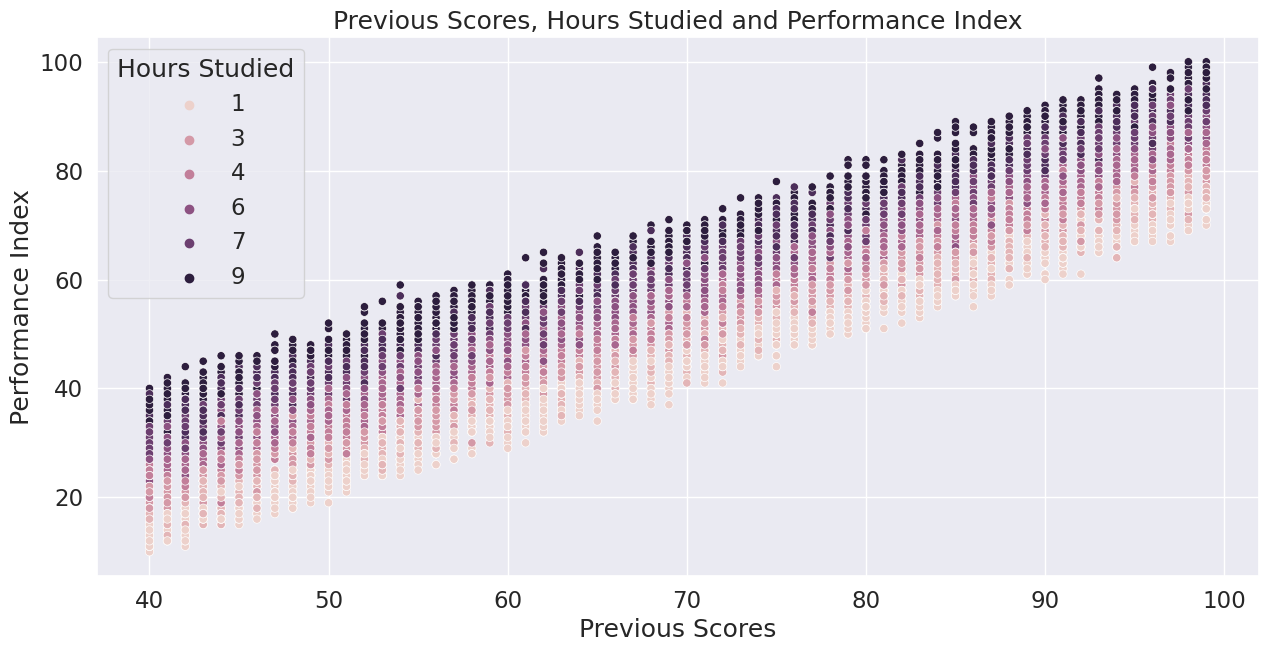

In [19]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=df['Previous Scores'], y=df['Performance Index'], hue=df['Hours Studied'])
plt.title('Previous Scores, Hours Studied and Performance Index')

### Model Build

In [20]:
df = pd.get_dummies(data=df, columns=['Extracurricular Activities'], dtype=int)

In [21]:
X = df.drop(columns=['Performance Index'])
y = df['Performance Index']

X_train = X.sample(frac=.7, random_state=0)
X_test = X.drop(X_train.index)
X_val = X_test.sample(frac=.33, random_state=0)
X_test = X_test.drop(X_val.index)

y_train = y.sample(frac=.7, random_state=0)
y_test = y.drop(y_train.index)
y_val = y_test.sample(frac=.33, random_state=0)
y_test = y_test.drop(y_val.index)

In [22]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=[6]),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    
model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss=['mse'],
                  metrics=['mae']
                 )

2023-11-29 07:06:44.894475: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-29 07:06:45.022391: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-29 07:06:45.022677: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [23]:
model.build()

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               896       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 34049 (133.00 KB)
Trainable params: 34049 (133.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
history = model.fit(X_train, y_train, epochs=100, validation_data=[X_val, y_val], verbose=1)

Epoch 1/100


2023-11-29 07:06:46.212566: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-11-29 07:06:46.665247: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f91b06ee020 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-29 07:06:46.665271: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2023-11-29 07:06:46.677825: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-29 07:06:46.706644: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
I0000 00:00:1701252406.803710   10363 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


219/219 [==============================] - 3s 3ms/step - loss: 144.8987 - mae: 7.8132 - val_loss: 35.1005 - val_mae: 4.7595
Epoch 2/100
219/219 [==============================] - 1s 3ms/step - loss: 27.4249 - mae: 4.2096 - val_loss: 25.5645 - val_mae: 4.0514
Epoch 3/100
219/219 [==============================] - 1s 3ms/step - loss: 20.5741 - mae: 3.6488 - val_loss: 20.1123 - val_mae: 3.6067
Epoch 4/100
219/219 [==============================] - 1s 3ms/step - loss: 14.1473 - mae: 3.0029 - val_loss: 11.5300 - val_mae: 2.7193
Epoch 5/100
219/219 [==============================] - 1s 3ms/step - loss: 7.5900 - mae: 2.1936 - val_loss: 5.5016 - val_mae: 1.8647
Epoch 6/100
219/219 [==============================] - 1s 3ms/step - loss: 5.5502 - mae: 1.8780 - val_loss: 4.8205 - val_mae: 1.7280
Epoch 7/100
219/219 [==============================] - 1s 2ms/step - loss: 5.1442 - mae: 1.8030 - val_loss: 4.3923 - val_mae: 1.6618
Epoch 8/100
219/219 [==============================] - 1s 3ms/step - los

219/219 [==============================] - 1s 2ms/step - loss: 4.5956 - mae: 1.7086 - val_loss: 5.5415 - val_mae: 1.8976
Epoch 63/100
219/219 [==============================] - 1s 2ms/step - loss: 4.6384 - mae: 1.7101 - val_loss: 4.3515 - val_mae: 1.6489
Epoch 64/100
219/219 [==============================] - 1s 2ms/step - loss: 4.5622 - mae: 1.6976 - val_loss: 5.0128 - val_mae: 1.7975
Epoch 65/100
219/219 [==============================] - 1s 2ms/step - loss: 4.7220 - mae: 1.7284 - val_loss: 4.4251 - val_mae: 1.6699
Epoch 66/100
219/219 [==============================] - 1s 2ms/step - loss: 4.8795 - mae: 1.7663 - val_loss: 7.0234 - val_mae: 2.1247
Epoch 67/100
219/219 [==============================] - 1s 3ms/step - loss: 4.7244 - mae: 1.7309 - val_loss: 4.4541 - val_mae: 1.6757
Epoch 68/100
219/219 [==============================] - 1s 2ms/step - loss: 4.9878 - mae: 1.7750 - val_loss: 4.6093 - val_mae: 1.6999
Epoch 69/100
219/219 [==============================] - 1s 2ms/step - loss:

In [26]:
def plot_loss():
    plt.figure(figsize=(10,7))
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)


In [27]:
def plot_mae():
    plt.figure(figsize=(10,7))
    plt.plot(history.history['mae'], label='MAE')
    plt.plot(history.history['val_mae'], label='val_MAE')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()
    plt.grid(True)


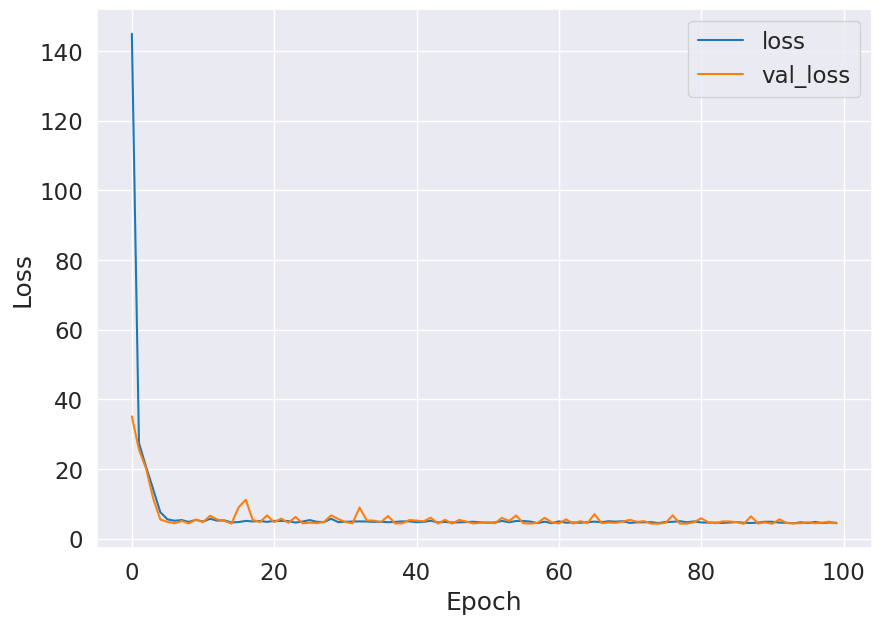

In [28]:
plot_loss()

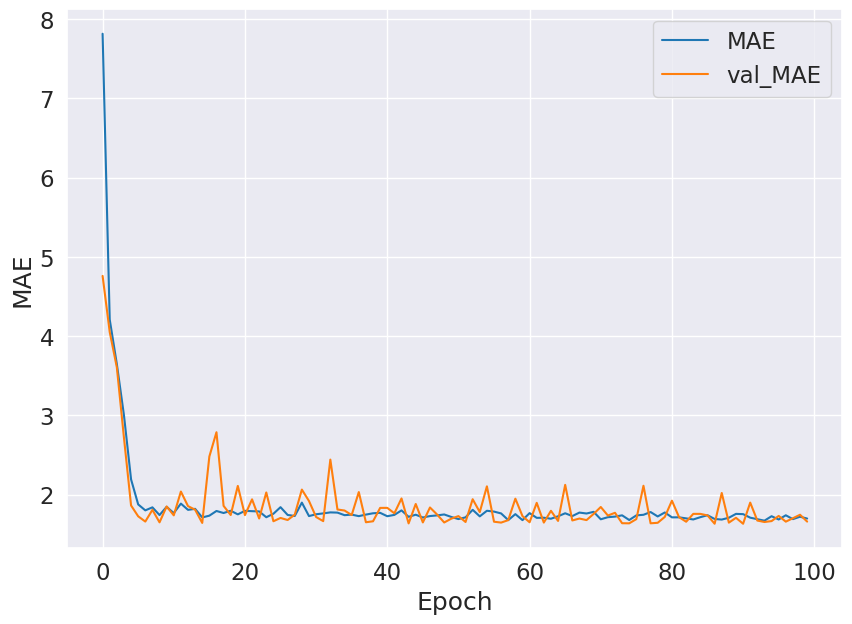

In [29]:
plot_mae()

In [30]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 4.2883 - mae: 1.6425


[4.288346767425537, 1.6424551010131836]